In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Ensures non-GUI backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # If using only plt, switch backend to Agg

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Inline plotting for Kaggle notebooks
%matplotlib inline

# Set visualisation style
sns.set(style='whitegrid')

#Data Loading

##We load the dataset containing global cybersecurity threats from 2015 to 2024. Note that the CSV file is using a comma as the delimiter and ASCII encoding.

In [2]:
data_path = 'Global_Cybersecurity_Threats_2015-2024.csv'
df = pd.read_csv(data_path, delimiter=',', encoding='ascii')

# Display the first few rows
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


#Data Exploration

##Before diving into the analysis, we take a look at the structure of the data, inspect the data types and look for any missing values.

In [4]:
# General information about the dataset
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print('Missing value in each column:')
print(missing_values)

# Staristical summary for numeric column
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB
Missing value in each column:
Country

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


#Data Cleaning and Preprocessing

In [5]:
# Handling missing values
# In this case, we choose to fill missing numeric values with their median and categorical values with the mode.
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

# Confirm that missing values have been handled
print('Missing values after cleaning:')
print(df.isnull().sum())

# Since 'Year' is integer and represents the year, we do not need to convert it to datetime
# but if a date conversion was necessary, one could use pd.to_datetime

Missing values after cleaning:
Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64


#Exploratory Data Analysis

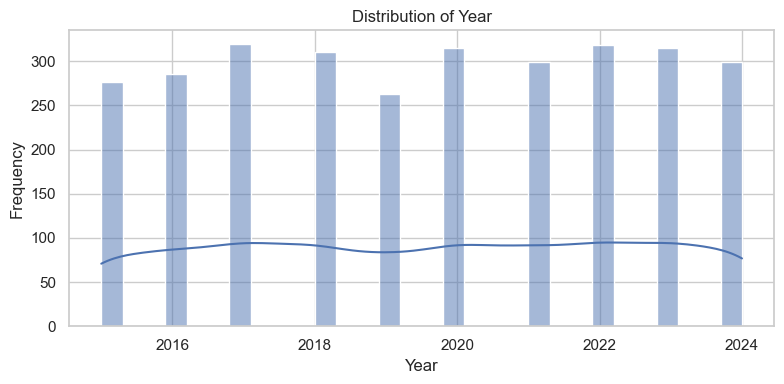

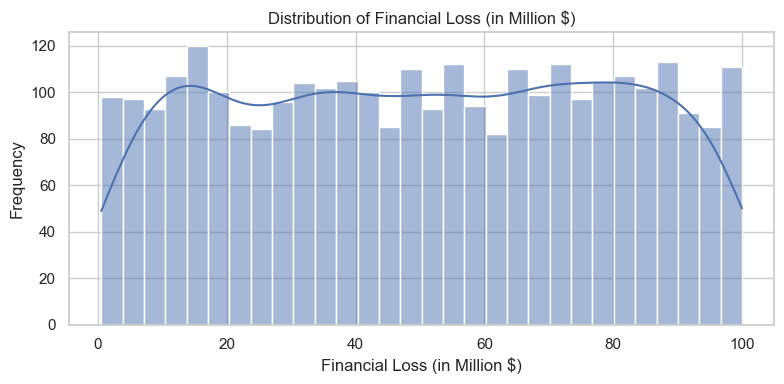

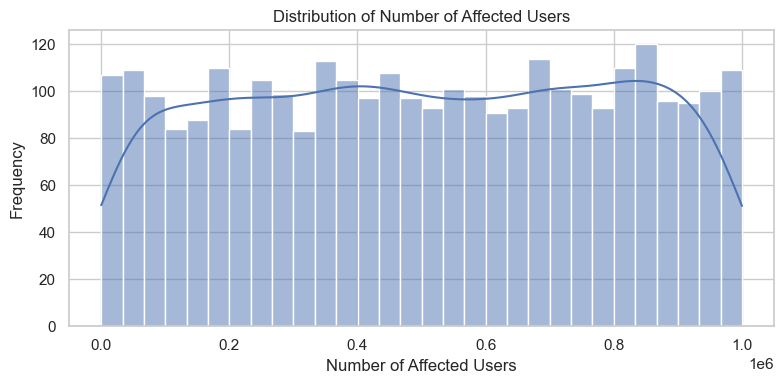

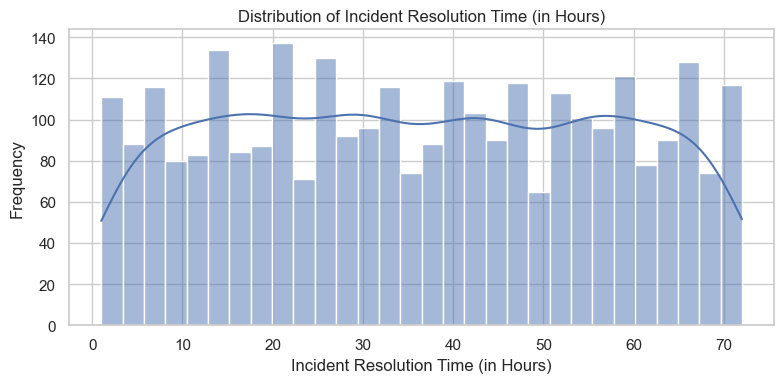

In [6]:
# Visualizing distributions of numeric features
numeric_cols = ['Year', 'Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

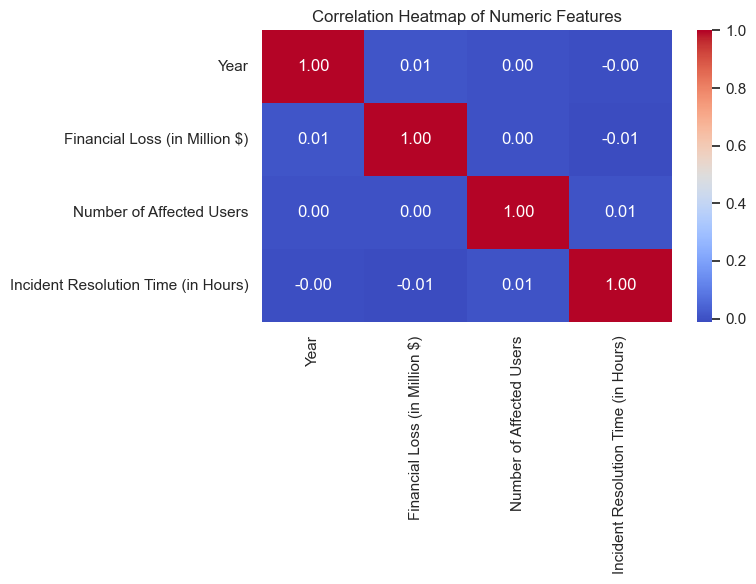

In [7]:
# Correlation heatmap for numeric features
numeric_df = df[numeric_cols]
if len(numeric_df.columns) >= 4:
    plt.figure(figsize=(8, 6))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()

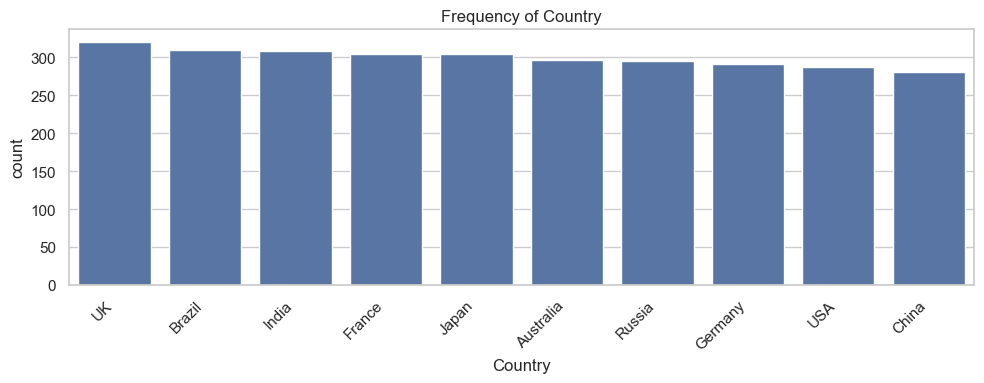

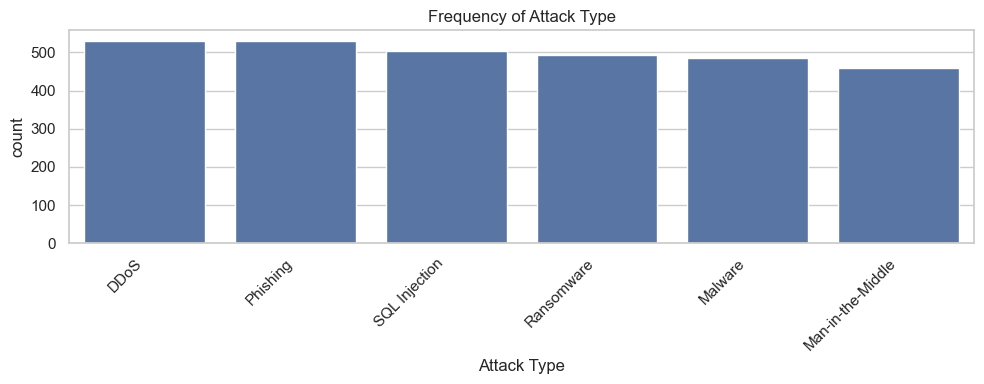

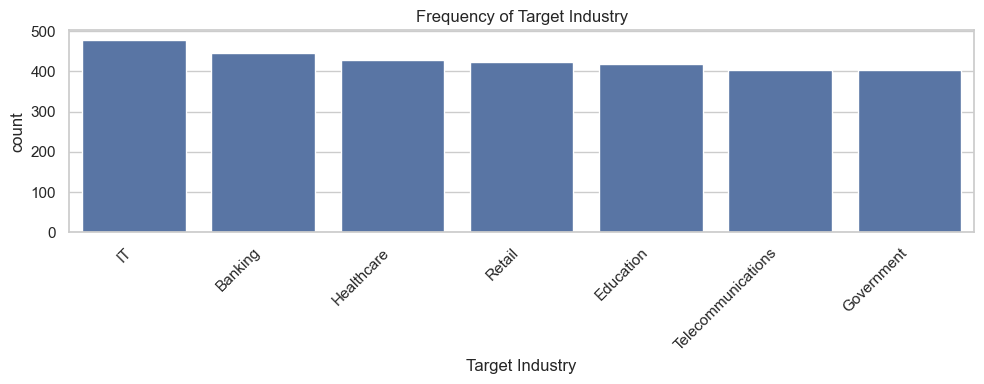

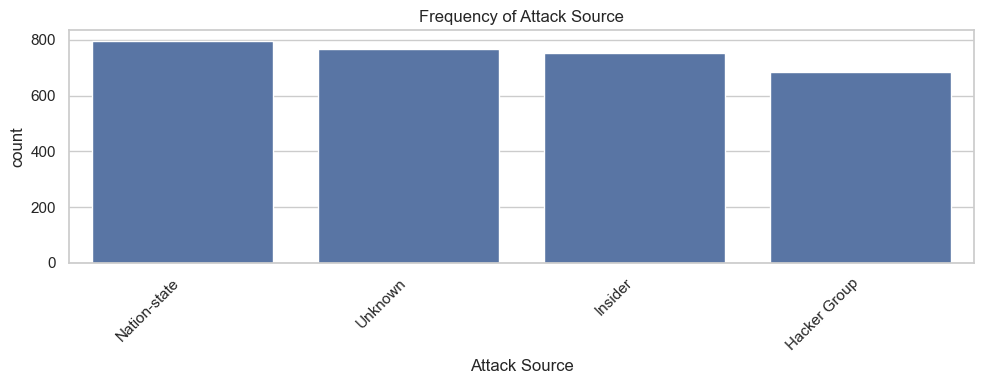

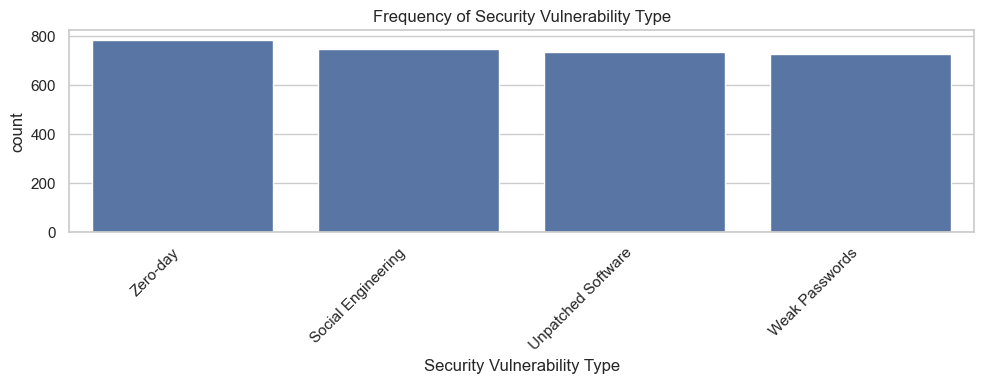

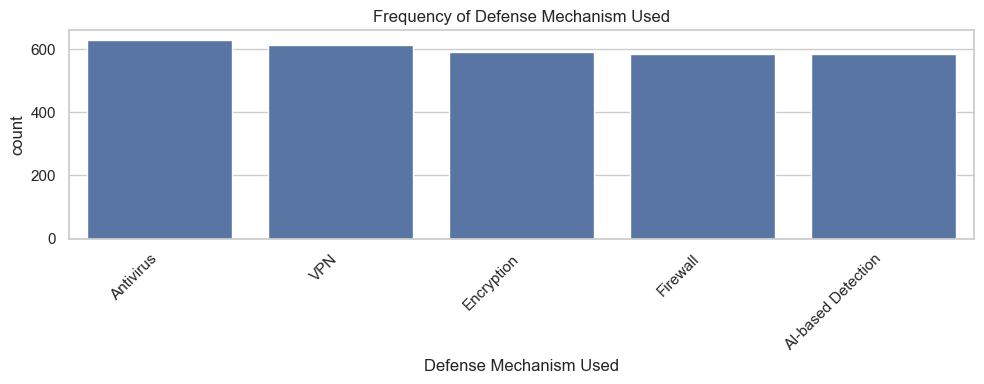

In [8]:
# Visualizing frequencies in categorical features using count plot
categorical_cols = ['Country', 'Attack Type', 'Target Industry', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Frequency of {col}')
    plt.tight_layout()
    plt.show()



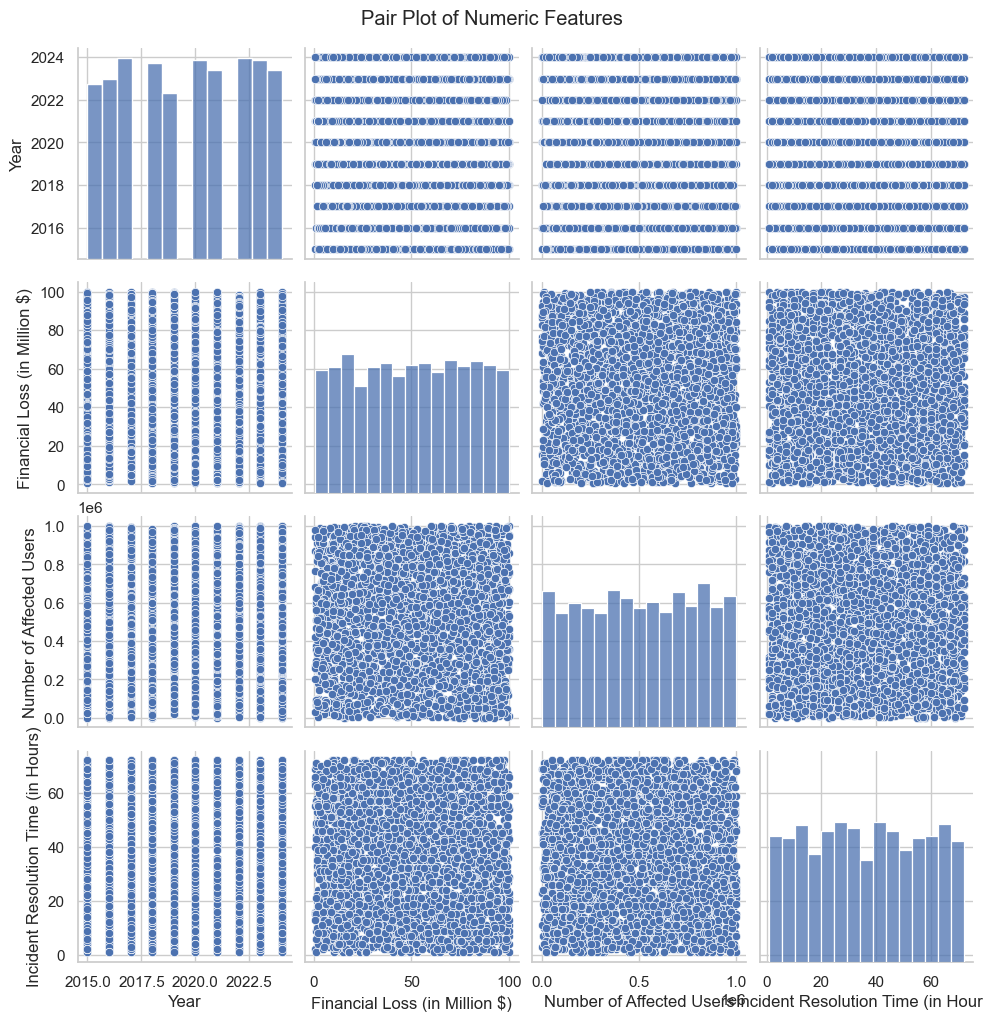

In [9]:
# Pair Plot for numeric feature 
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

#Predictive Modeling